In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

dpi = 400
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
df = pd.read_csv('per_residue_summary.csv')

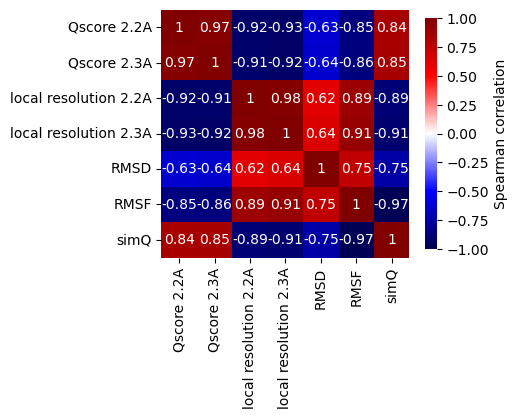

In [3]:
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(df.iloc[:,1:].corr(method='spearman'), vmin=-1, vmax=1, annot=True,cmap="seismic",square=True,
                     cbar_kws={'shrink':0.75,'label':'Spearman correlation'})
plt.savefig(f"per_res_correlation.svg",bbox_inches="tight",transparent=True)
plt.savefig(f"per_res_correlation.png", dpi=dpi,bbox_inches="tight",transparent=True)

In [4]:
df["Qscore"] = (df["Qscore 2.2A"] + df["Qscore 2.3A"])/2
df["SimB"] = ((8*np.pi**2)/3)*(df.RMSF**2)

1.0586162060535782e-116


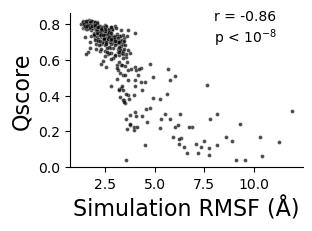

In [6]:
y= "Qscore"
x= "RMSF"
plt.figure(figsize=(3,2))
r,p = stats.spearmanr(df[[x,y]].to_numpy(),axis=0,nan_policy="omit")#,alternative='two-sided')
sns.scatterplot(data=df,y=y,x=x,color="black",alpha=0.7,s=8)
plt.xlabel("Simulation RMSF (Å)",fontsize=16)
plt.ylabel("Qscore",fontsize=16)
sns.despine()
print(p)
t=plt.text(8,0.7,f"r = {round(r,2)}\np < "+r'$10^{-8}$')
plt.savefig(f"rmsf_v_q.svg",bbox_inches="tight",transparent=True)
plt.savefig(f"rmsf_v_q.png", dpi=dpi,bbox_inches="tight",transparent=True)

-0.8638497827544328 1.0586162060535782e-116


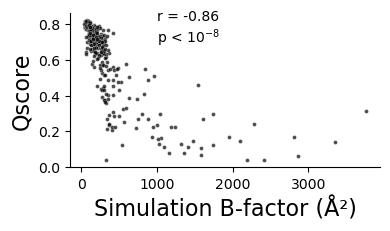

In [7]:
y= "Qscore"
x= "SimB"
plt.figure(figsize=(4,2))
r,p = stats.spearmanr(df[[x,y]].to_numpy(),axis=0,nan_policy="omit")#,alternative='two-sided')
print(r,p)
sns.scatterplot(data=df,y=y,x=x,color="black",alpha=0.7,s=8)
plt.xlabel("Simulation B-factor (Å²)",fontsize=16)
plt.ylabel("Qscore",fontsize=16)
sns.despine()
t=plt.text(1000,0.7,f"r = {round(r,2)}\np < "+r'$10^{-8}$')
plt.savefig(f"rmsf2_v_q.svg",bbox_inches="tight",transparent=True)
plt.savefig(f"rmsf2_v_q.png", dpi=dpi,bbox_inches="tight",transparent=True)